In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.collections import LineCollection
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40., 7.)
matplotlib.rcParams.update({'font.size': 22})

%load_ext autoreload
%autoreload 2

from Database import *
from Densities import *
from MultiIndex import *
from Surrogates import *
from Transport import *

import plotutil, randutil

def plot_density(ax, t, n=200, alpha=1, cmap='viridis') :
    x = np.linspace(-1,1,n)
    X, Y = np.meshgrid(x, x)
    pts = np.vstack((X.flatten(), Y.flatten()))
    Ztar = np.ones((len(x), len(x)))
    if t is not None :
        Ztar = t.eval(pts).reshape((len(x), len(x)))
    ax.contourf(X, Y, Ztar, cmap=cmap, alpha=alpha)
    
def get_ax_clean(fig, nx=1, ny=1, n=1, title='') :
    ax = fig.add_subplot(ny,nx,n)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_aspect('equal', 'box')
    ax.set_title(title)
    return ax

def plot_results(t, s, p_uni, p_tar, lines, lines_t) :
    n = 4
    fig = plt.figure(figsize=(n*8,8))
    ax = get_ax_clean(fig, nx=n, n=1); plot_density(ax, t, cmap='Blues')
    ax = get_ax_clean(fig, nx=n, n=2); plot_density(ax, s, cmap='Blues')
    ax = get_ax_clean(fig, nx=n, n=3); ax.scatter(p_tar[0], p_tar[1], s=50, alpha=.6)
    for l in lines_t : 
        ax.plot(l[0], l[1], '#c8c8c8', lw=2)
    ax = get_ax_clean(fig, nx=n, n=4); ax.scatter(p_uni[0], p_uni[1], s=50, alpha=.6)
    for l in lines : 
        ax.plot(l[0], l[1], '#c8c8c8', lw=2)
    plt.tight_layout()
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
t = Rosenbrock(a=.2, b=8, theta=-2.2/10*np.pi, centr=np.array([.5,-.5]), scale=1.1)
m = TotalDegreeSet(dim=2, order=11)
s = Legendre(multis=m, target=t, method='wls')
r = TransportMap(s)

 ///////////  78 (3120, 78) 269.8519870093539
condition number  5.546663196995767


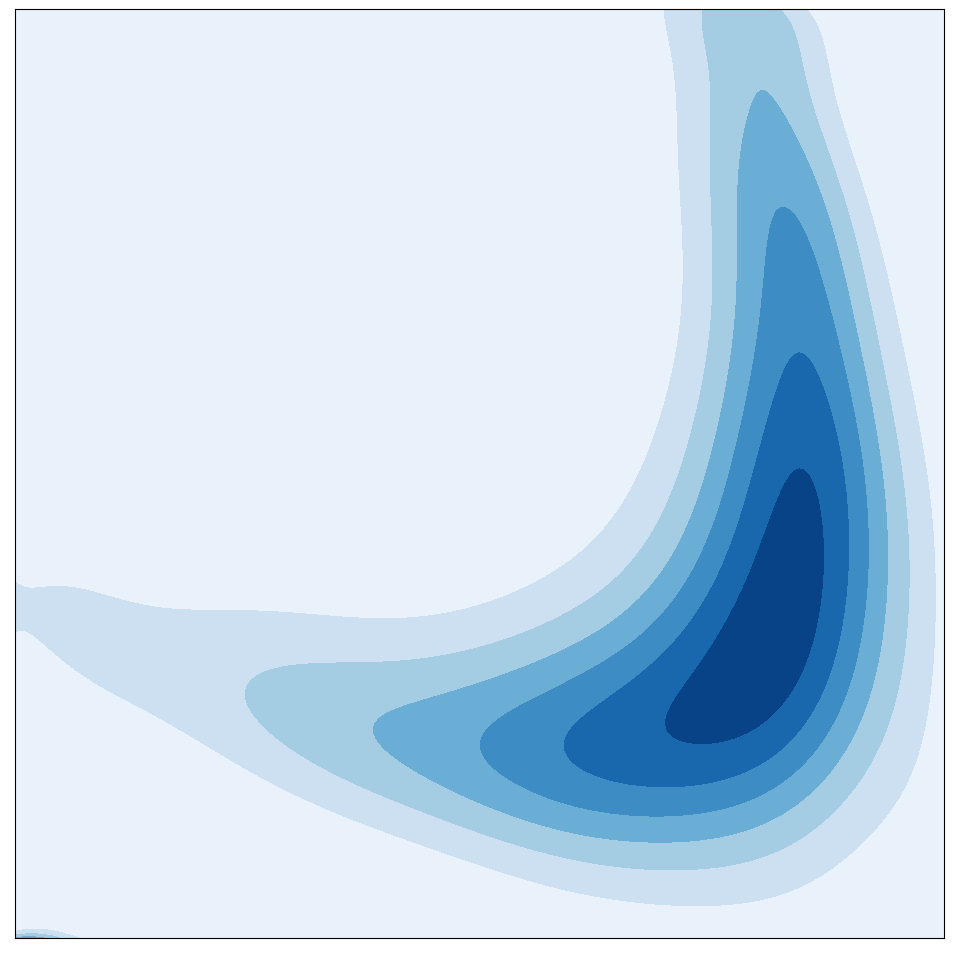

In [129]:
ax = get_ax_clean(plt.figure(figsize=(10,10)), nx=1, n=1); 
plot_density(ax, s, cmap='Blues')
plt.tight_layout()
plt.savefig('/home/uq/notes/02 transport maps poster/figures/surrogate_density.pdf')
plt.show()

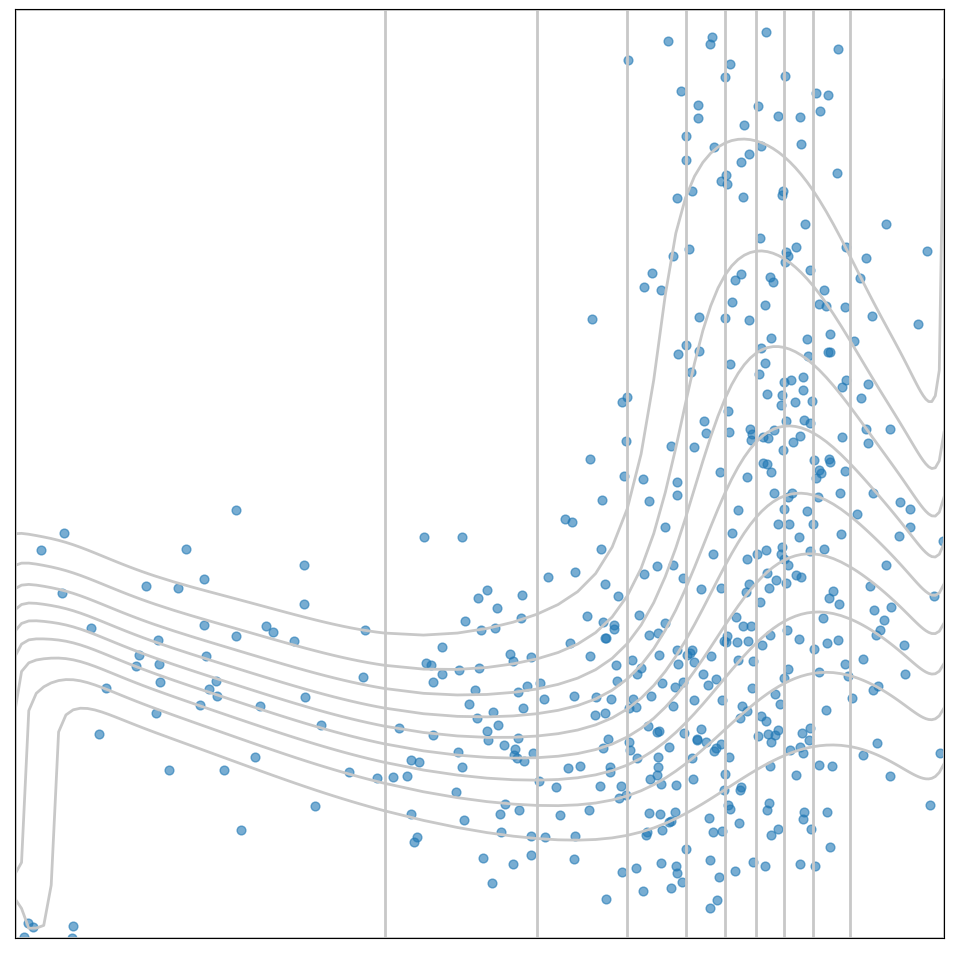

In [132]:
ax = get_ax_clean(plt.figure(figsize=(10,10)), nx=1, n=1); 
ax.scatter(p_tar_c[0], p_tar_c[1], s=40, alpha=.6)
for l in lines_t_c : 
    ax.plot(l[0], l[1], '#c8c8c8', lw=2)
plt.tight_layout()
plt.savefig('/home/uq/notes/02 transport maps poster/figures/surrogate_samples.pdf')
plt.show()

In [106]:
p_uni_c, p_tar_c = r.samples(500, p_uni_c)

In [130]:
lines_c, lines_t_c = r.grid(xs=[-1, -.95, -.8, -.4, 0, .4, .8, .95, 1], ns=[20, 20, 10, 10, 10, 10, 20, 20])

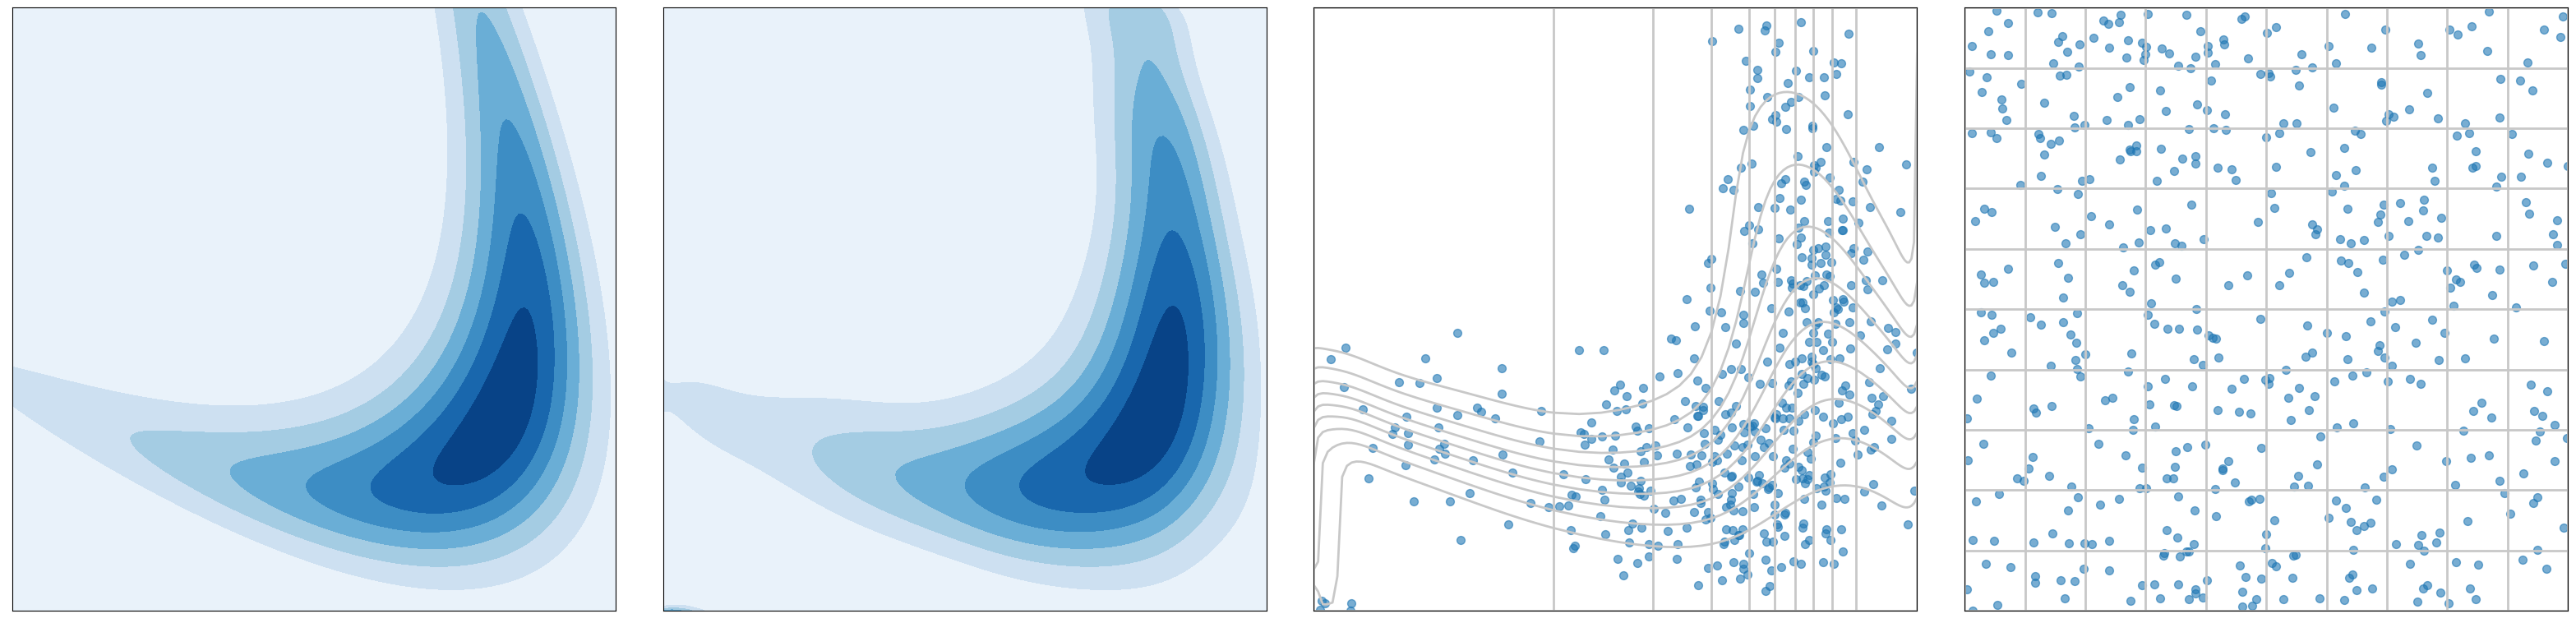

In [131]:
plot_results(t, s, p_uni_c, p_tar_c, lines_c, lines_t_c)

In [51]:
n = 50
x = np.linspace(-1,1,n)
X, Y = np.meshgrid(x, x)
sx = np.zeros((n,n,2))
tx = np.zeros((n,n,2))
for i in range(n) :
    for j in range(n) :
        sx[i,j] = r.eval([X[i,j],Y[i,j]])
        tx[i,j] = r.inveval([X[i,j],Y[i,j]])

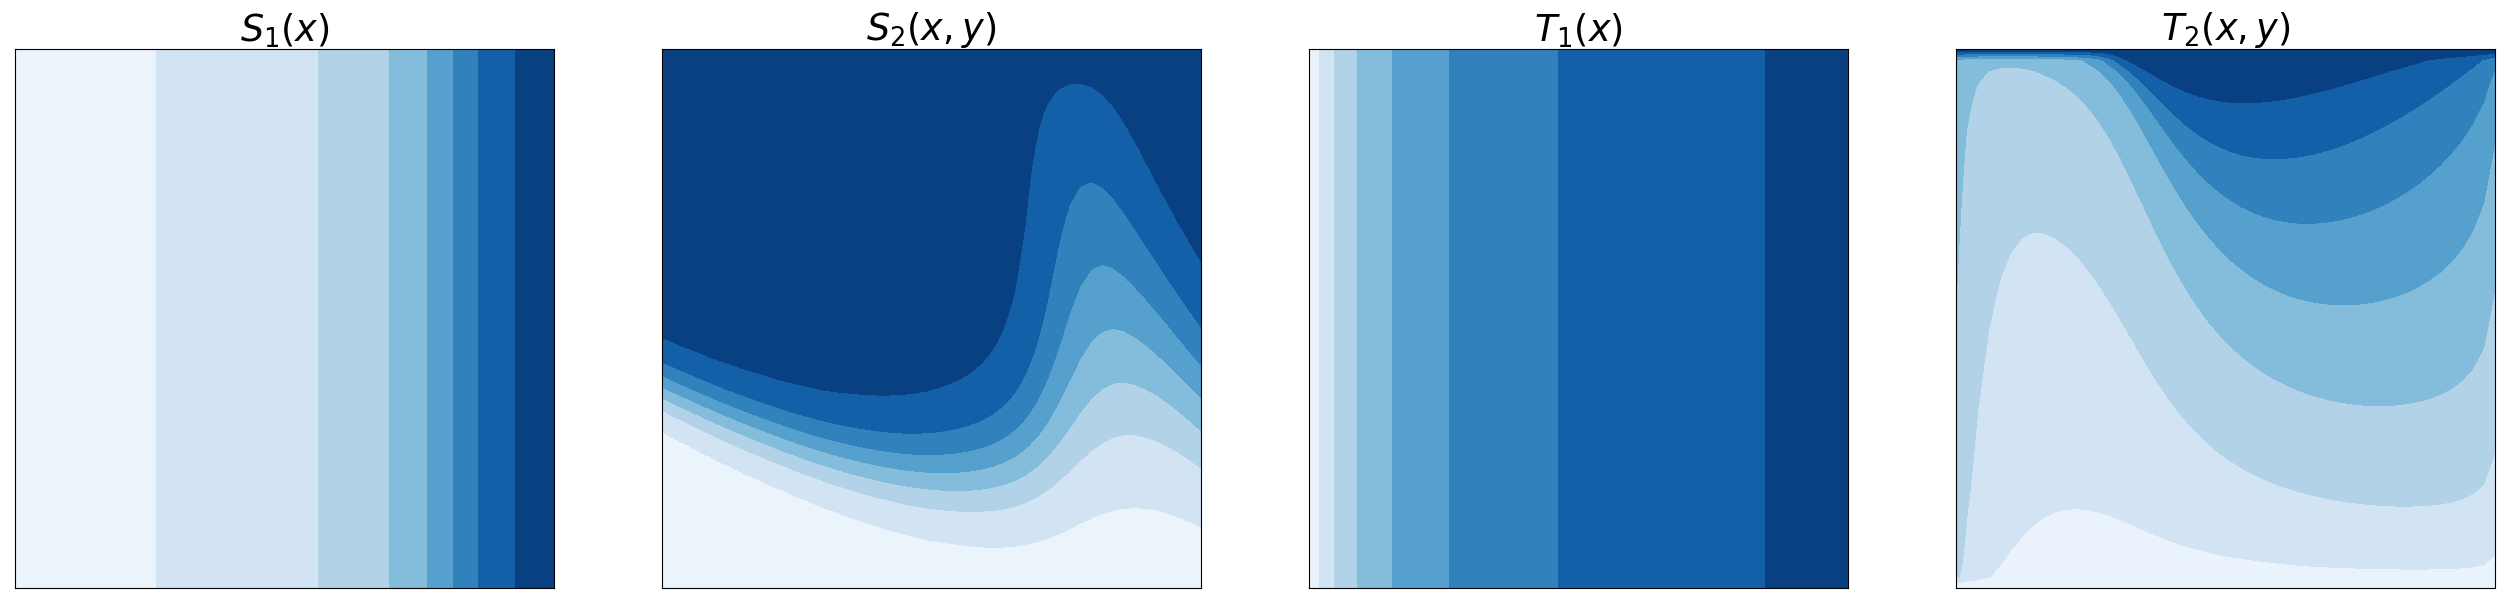

In [52]:
m = 4
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(m*8,8))
ax = get_ax_clean(fig, nx=m, n=1, title=r'$S_1(x)$'); ax.contourf(X, Y, sx[:,:,0], cmap='Blues')
ax = get_ax_clean(fig, nx=m, n=2, title=r'$S_2(x,y)$'); ax.contourf(X, Y, sx[:,:,1], cmap='Blues')
ax = get_ax_clean(fig, nx=m, n=3, title=r'$T_1(x)$'); ax.contourf(X, Y, tx[:,:,0], cmap='Blues')
ax = get_ax_clean(fig, nx=m, n=4, title=r'$T_2(x,y)$'); ax.contourf(X, Y, tx[:,:,1], cmap='Blues')
plt.show()

In [34]:
m2 = TotalDegreeSet(dim=2, order=5)
s2 = Legendre(multis=m2, target=t, method='wls')
r2 = TransportMap(s2)
p_tar2 = np.zeros(p_uni.shape)
for j in range(p_uni.shape[1]) :
    p_tar2[:,j] = r2.inveval(p_uni[:,j][::-1])[::-1]
lines_t2 = []
for l in lines :
    lines_t2.append(np.array([np.array(r2.inveval(x[::-1])[::-1]) for x in l.T]).T)

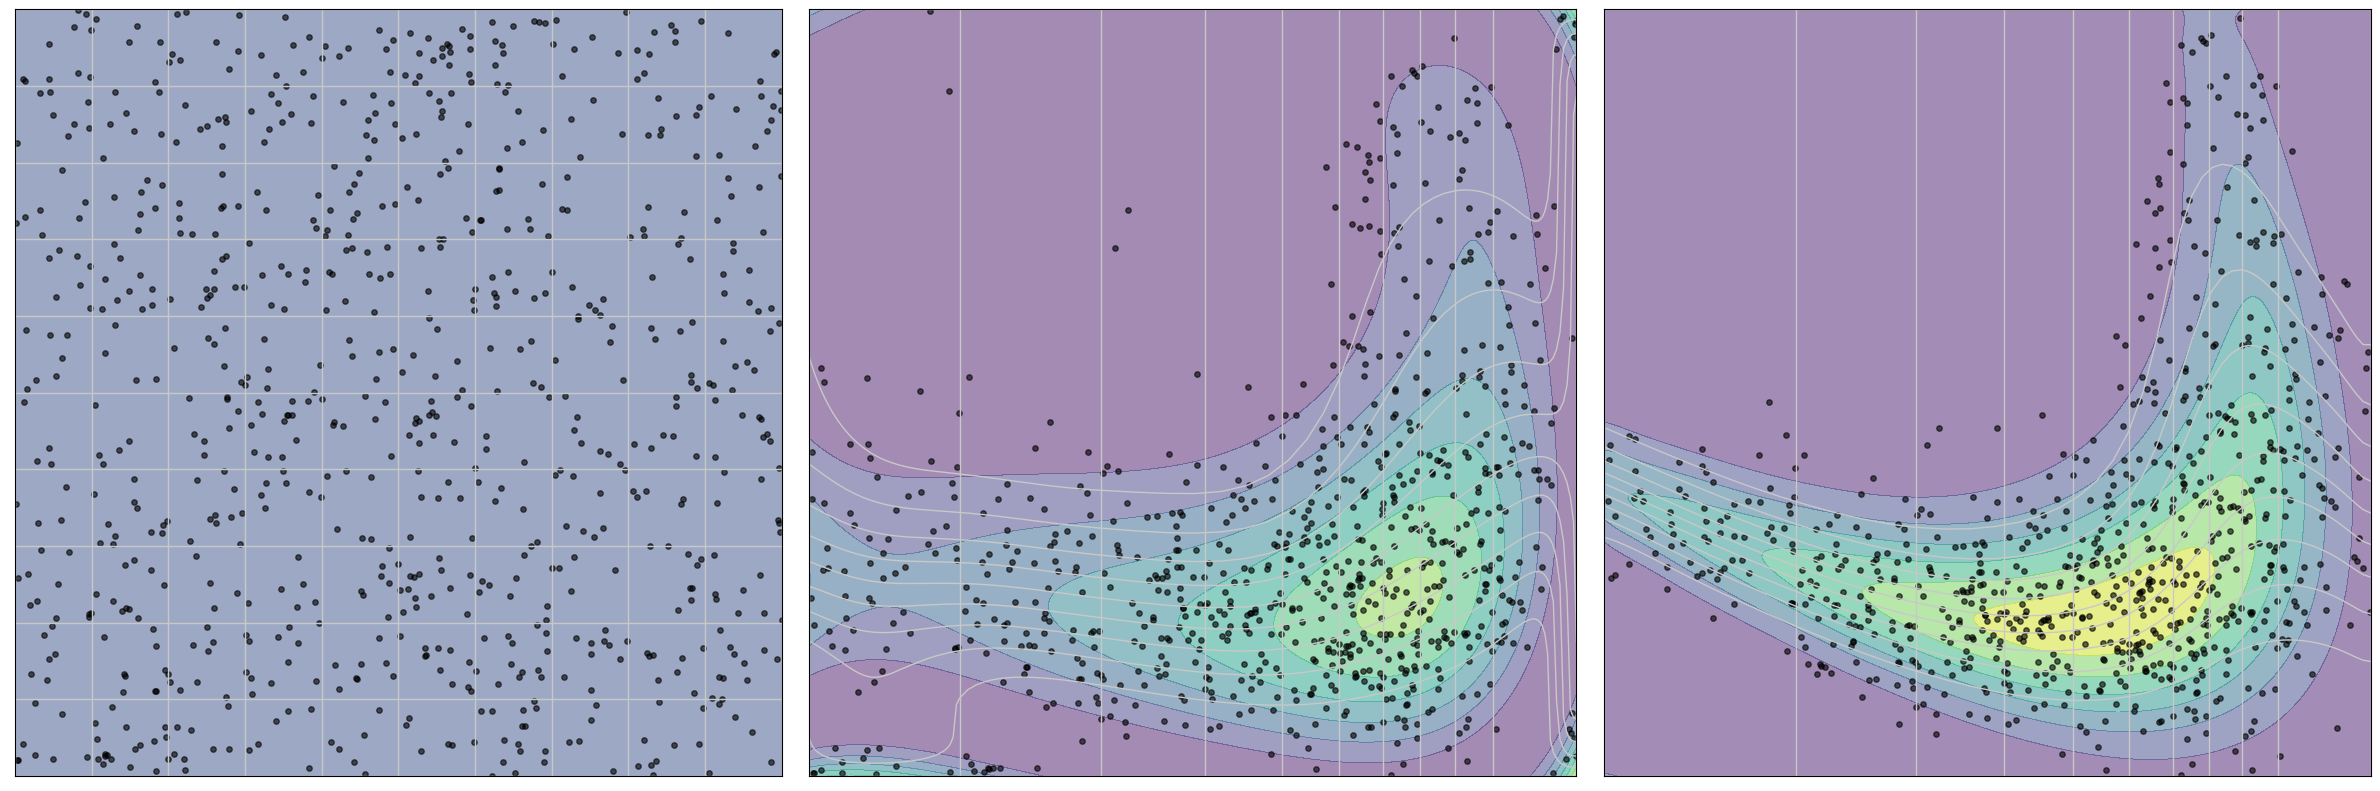

In [69]:
p_args = {'color' : 'k', 's' : 15, 'alpha' : .6}
g_args = {'color' : '#c8c8c8', 'lw' : 1}

n = 3
fig = plt.figure(figsize=(n*8,8))

ax = get_ax_clean(fig, nx=n, n=1)
plot_density(ax, None, alpha=.5)
for l in lines : ax.plot(-l[1], -l[0], **g_args)
ax.scatter(-p_uni[1], -p_uni[0], **p_args)

ax = get_ax_clean(fig, nx=n, n=2); 
plot_density(ax, s2, alpha=.5)
for l in lines_t2 : ax.plot(-l[1], -l[0], **g_args)
ax.scatter(-p_tar2[1], -p_tar2[0], **p_args)

ax = get_ax_clean(fig, nx=n, n=3);
plot_density(ax, s, alpha=.5)
for l in lines_t : ax.plot(-l[1], -l[0], **g_args)
ax.scatter(-p_tar[1], -p_tar[0], **p_args)

plt.tight_layout()
plt.show()

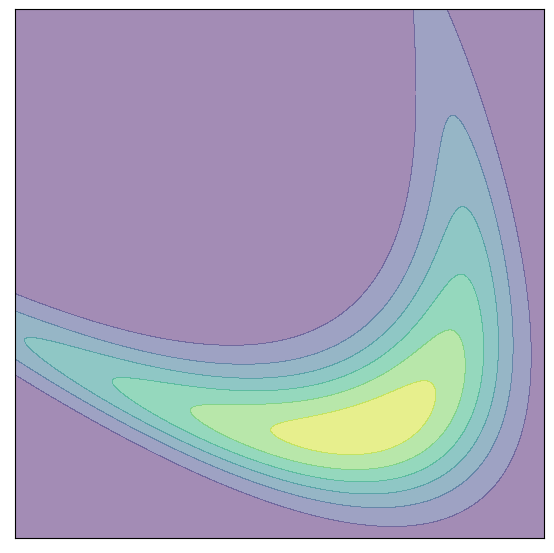

In [35]:
fig = plt.figure(figsize=(6,6))
ax = get_ax_clean(fig, nx=1, n=1)
plot_density(ax, t, alpha=.5)
plt.tight_layout()
plt.savefig('rosenbrock_samples_true.pdf')
plt.show()

In [ ]:
rr = TransportMap(ss)
pp = randutil.points(2,10000)
ii = np.zeros(pp.shape)
for j in range(pp.shape[1]) :
    ii[:,j] = rr.inveval(pp[:,j])

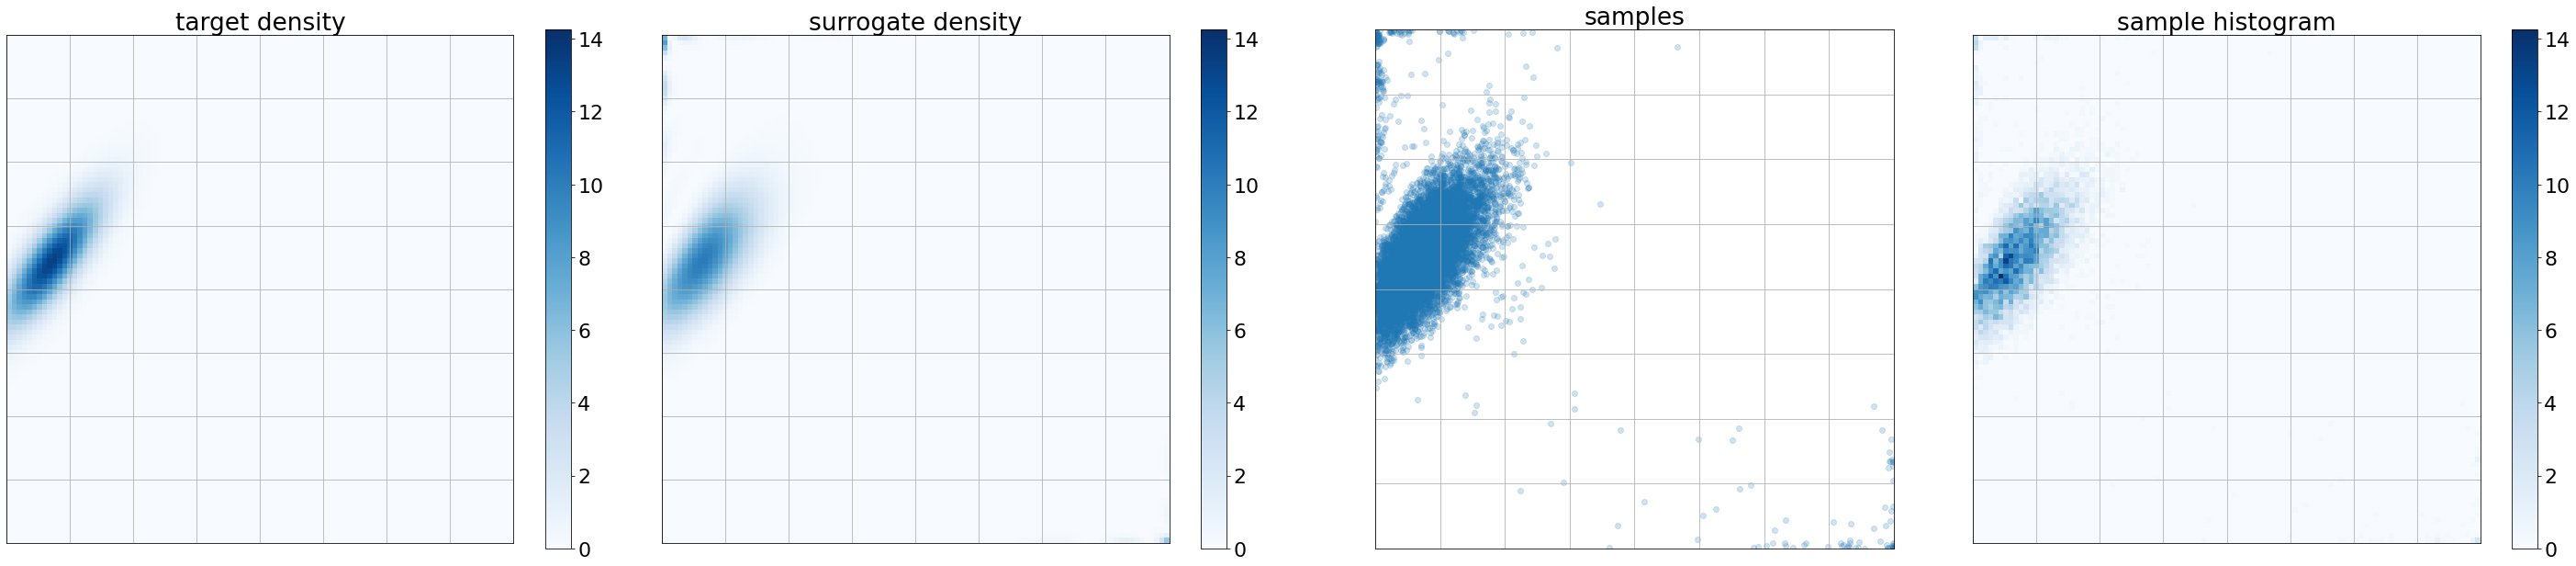

In [98]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

ZZtar = tt.eval(pts).reshape((len(x), len(x)))
ZZtar /= np.sum(ZZtar) * 4/len(x)**2
ZZsur = ss.eval(pts).reshape((len(x), len(x)))
ZZsur /= np.sum(ZZsur) * 4/len(x)**2
ZZsam, _, _ = np.histogram2d(ii[1], ii[0], bins=100, density=True, range=[[-1,1], [-1,1]])

vmax = max(np.max(ZZtar), np.max(ZZsur), np.max(ZZsam))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#cs = ax.contourf(X, Y, ZZtar, levels=[-1, 0, .1, 1, 10, 100], norm=colors.LogNorm())
cs = ax.imshow(ZZtar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
fig.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#cs = ax.contourf(X, Y, ZZsur)#, levels=cs.levels)
cs = ax.imshow(ZZsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 3, xlabel='', title='samples')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(ii[1], ii[0], alpha=.2)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

ax = plotutil.get_ax(fig, 4, 4, xlabel='', title='sample histogram')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(ZZsam.T, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

In [68]:
p_uni = randutil.points(2,1000)
p_tar = np.zeros(p_uni.shape)
for j in range(p_uni.shape[1]) :
    p_tar[:,j] = r.inveval(p_uni[:,j])

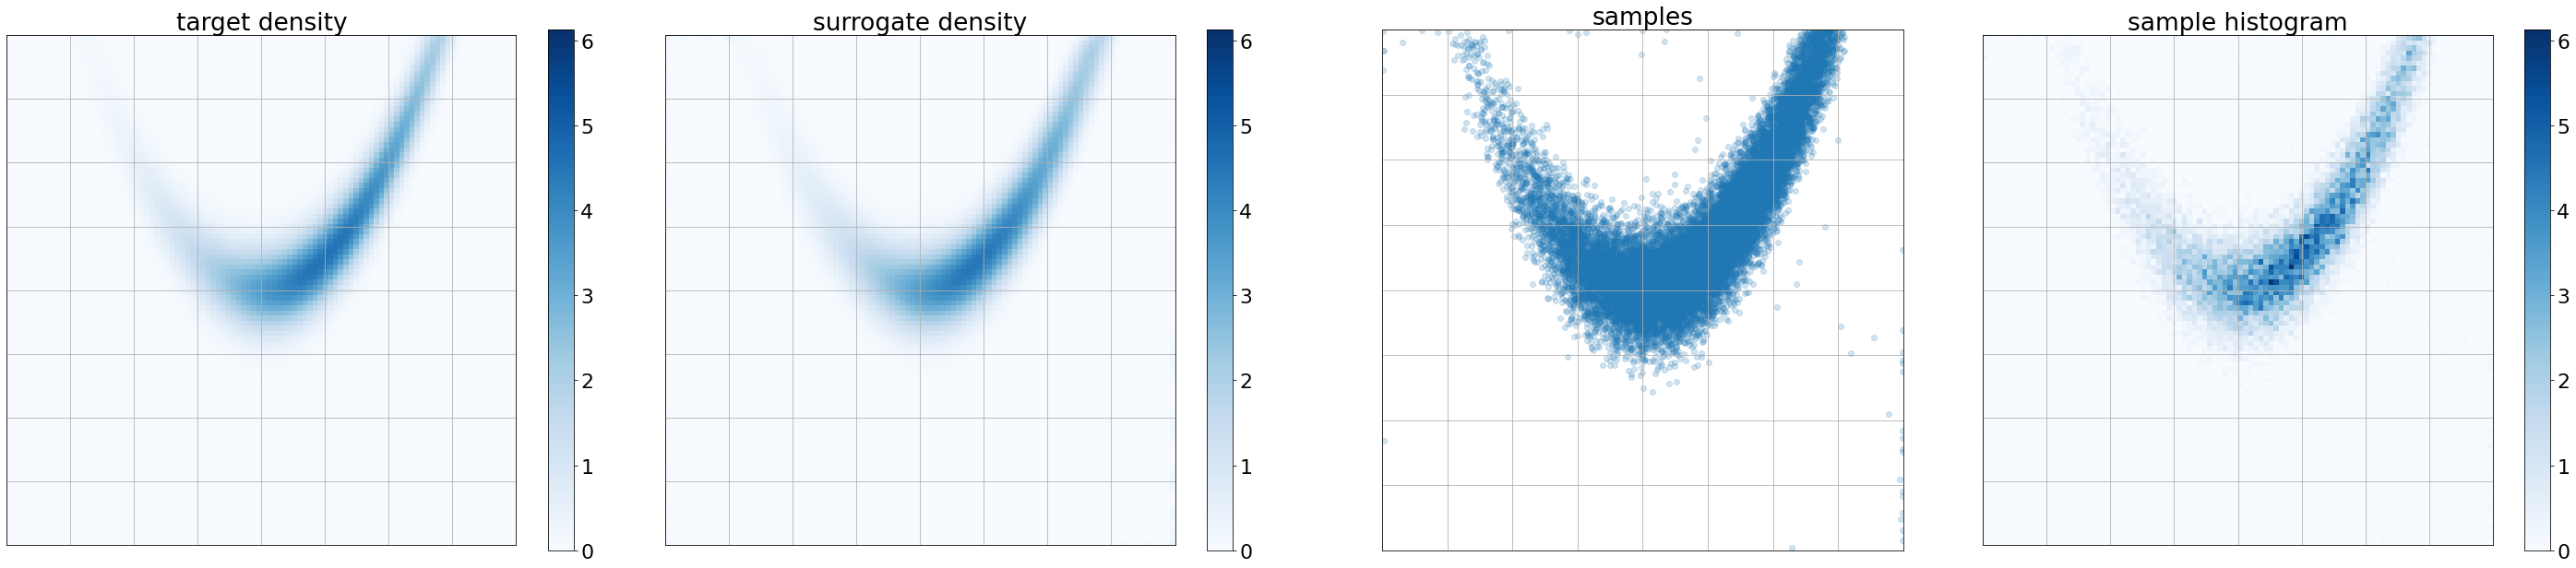

In [42]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2
Zsam, _, _ = np.histogram2d(i[1], i[0], bins=100, density=True, range=[[-1,1], [-1,1]])

vmax = max(np.max(Ztar), np.max(Zsur), np.max(Zsam))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 3, xlabel='', title='samples')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(i[1], i[0], alpha=.2)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

ax = plotutil.get_ax(fig, 4, 4, xlabel='', title='sample histogram')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsam.T, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

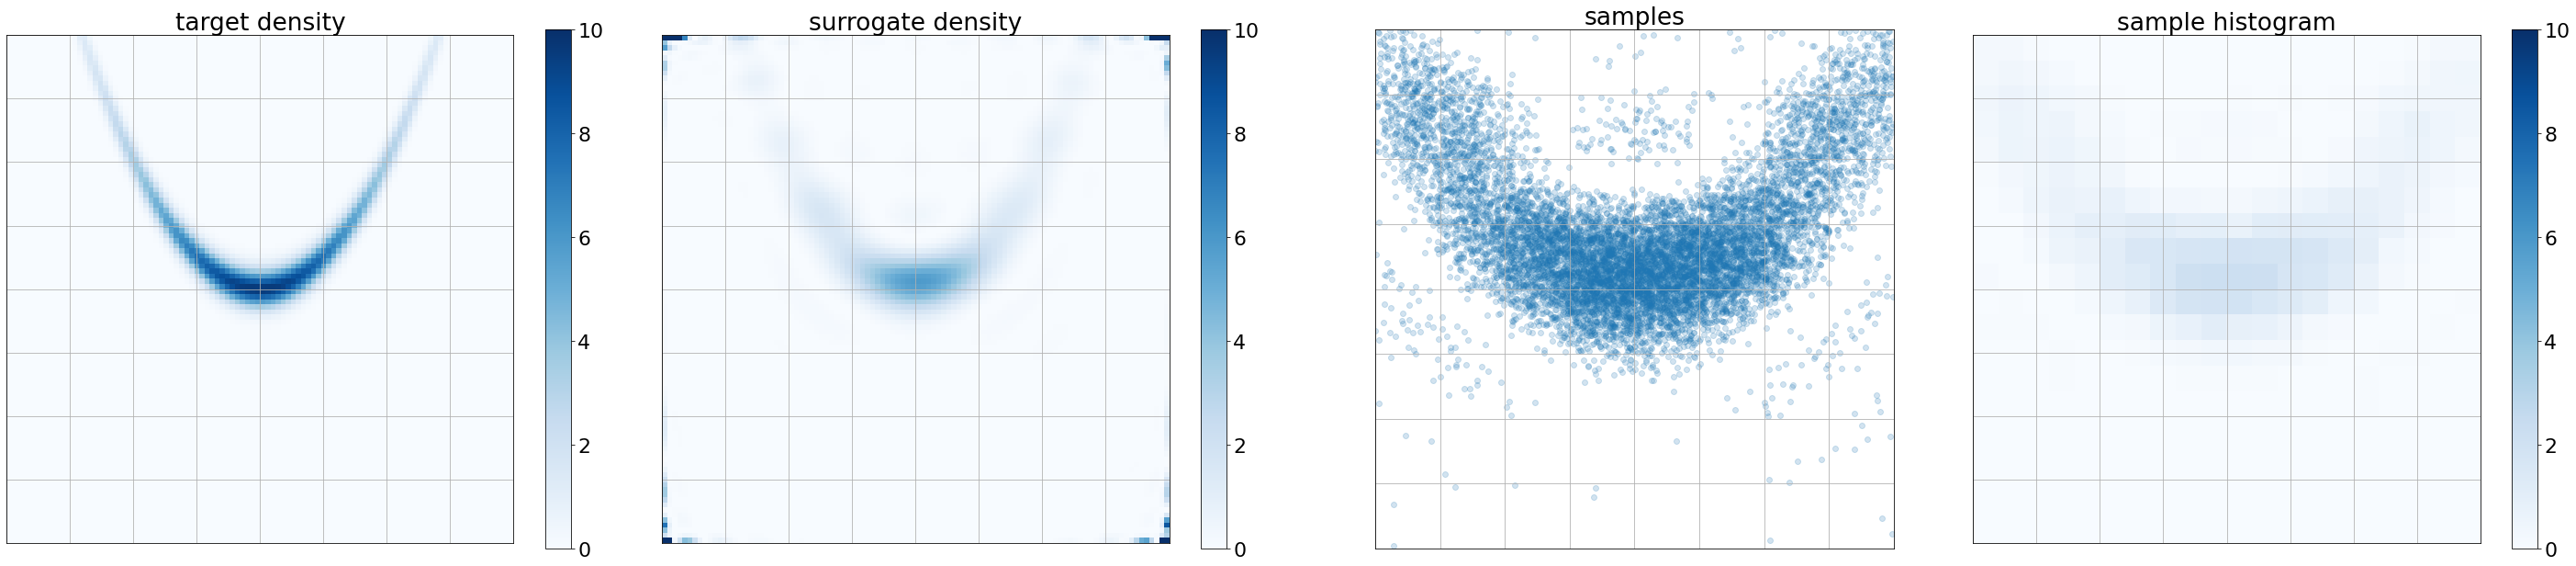

In [18]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2
Zsam, _, _ = np.histogram2d(i[1], i[0], bins=20, density=True, range=[[-1,1], [-1,1]])

vmax = 10 # max(np.max(Ztar), np.max(Zsur), np.max(Zsam))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 3, xlabel='', title='samples')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(i[1], i[0], alpha=.2)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

ax = plotutil.get_ax(fig, 4, 4, xlabel='', title='sample histogram')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsam.T, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

setup TotalDegreeSet


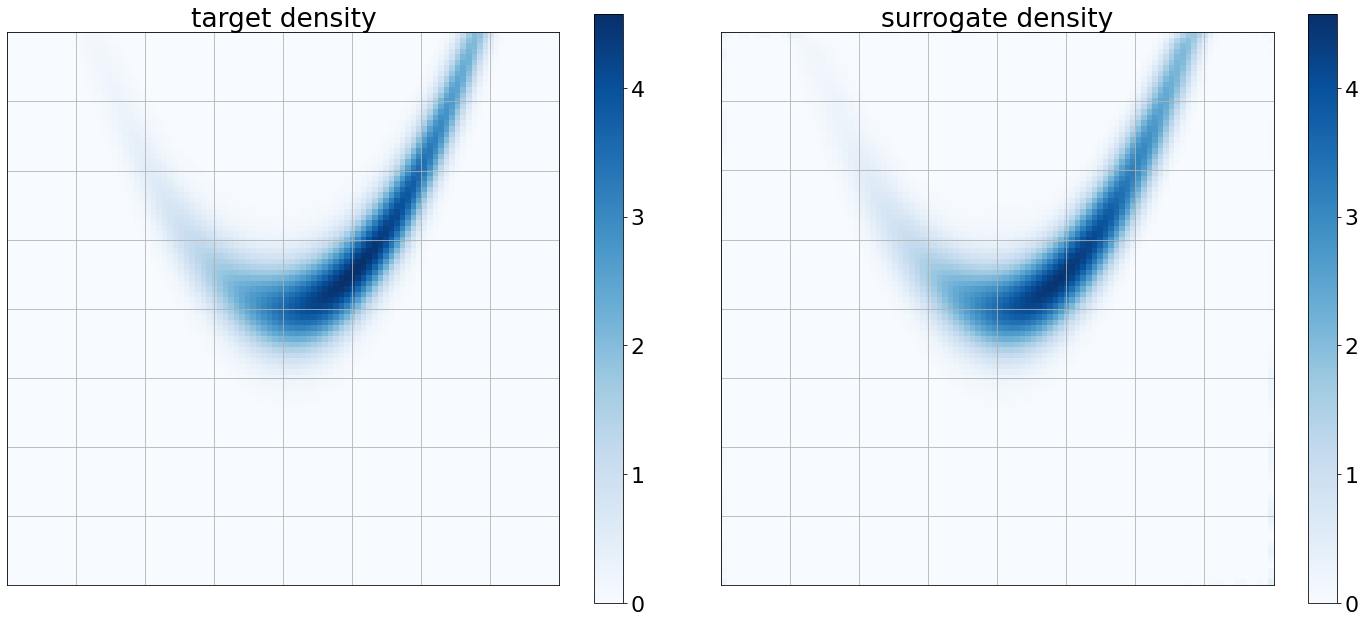

In [38]:
#t = Rosenbrock(a=-.21, b=10)
#m = TotalDegreeSet(dim=2, k=30)
#s = Legendre(multis=m, target=t, method='wls')

t = Rosenbrock(a=.5, b=10)
m = TotalDegreeSet(dim=2, k=30)
s = Legendre(multis=m, target=t, method='wls')

x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2

vmax = np.max(Ztar)# max(np.max(Ztar), np.max(Zsur))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

setup TotalDegreeSet
Surrogate... Done


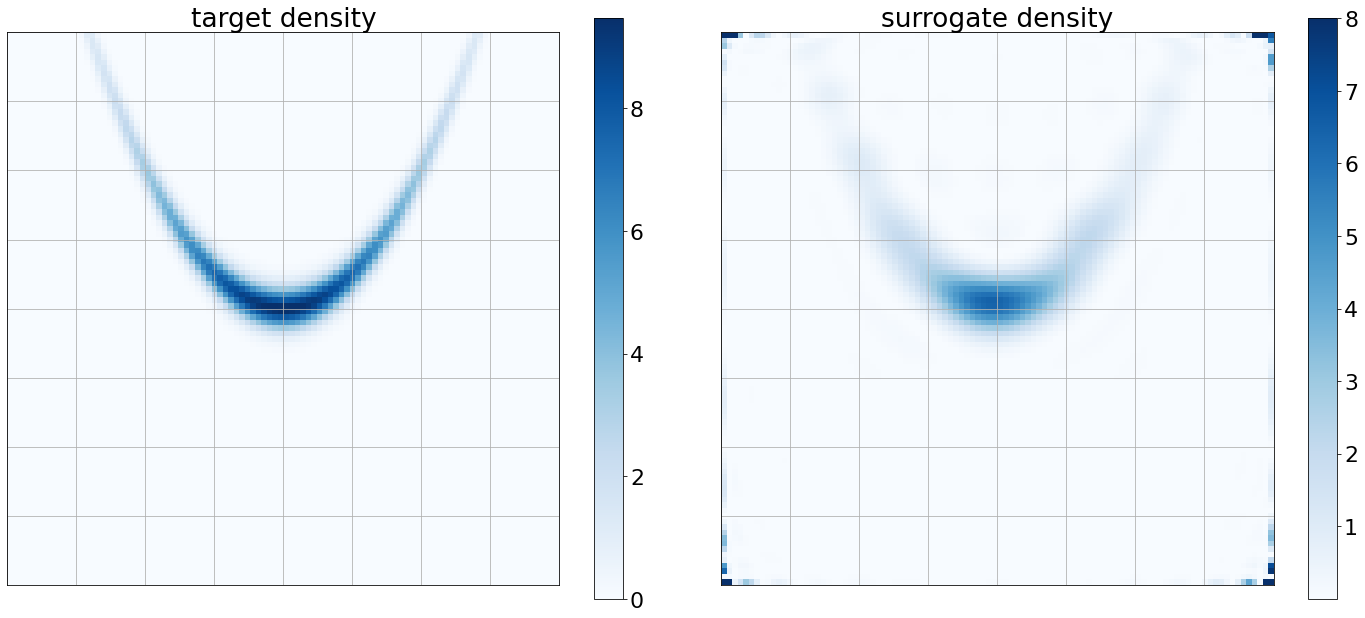

In [29]:
t = Rosenbrock(a=0, b=50)
m = TotalDegreeSet(dim=2, k=23)
s = Legendre(multis=m, target=t, method='wls')

x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmax=8, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
mpl.use('pgf')

import matplotlib.pyplot as plt
plt.show()

In [27]:
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

query = """
select ros.id, ros.a, ros.b, mul.size, evl.hedist
  from surrogateevaldbo as evl
  join surrogatedbo as sur
    on evl.surrog_id = sur.id
  join rosenbrockdbo as ros 
    on sur.target_id = ros.id
   and sur.target = 'rosenbrock'
  join multiindexsetdbo as mul
    on sur.multis_id = mul.id
"""

def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
tex = 0

if tex : 
    matplotlib.use('pgf')
else :
    matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 11})

ax = plotutil.get_ax(plt.figure(figsize=(5, 2.5)), 1, 1, xlabel=r'$|\Lambda|$', ylabel=r'$\| \sqrt{f_\pi} - \sqrt{f_{\tilde \pi}}\|_{L^2}$', logaxis=['x', 'y'])

cursor = DB.execute_sql(query)
col_names = [col[0] for col in cursor.description]
res = sorted([dict(zip(col_names, row)) for row in cursor.fetchall()], key=lambda x : x['id'])

for k, g in itertools.groupby(res, lambda x : x['id']) :
    data = np.array([[r['size'], r['hedist'], r['a'], r['b']] for r in sorted(g, key=lambda x :  x['size']) if r['hedist'] is not None])
    try :
        if len(data) > 0 :
            ax.scatter(data[:, 0], data[:, 1], marker='+', s=50)
    except IndexError :
        print(d, data)

ax.set_xlim([10,1000])
matplotlib.pyplot.grid(True, which="both")
plt.tight_layout()
if tex :
    pyplot.savefig('/home/uq/notes/02 transport maps paper/fig/rosenbrock_error.pgf', format='pgf')
else :
    plt.show()

NameError: name 'matplotlib' is not defined

In [58]:
x = np.linspace(-1,1,200)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))
p_uni_2 = randutil.points(2,200)


ks = [30]
n = len(ks)
ss = [Legendre(multis=TotalDegreeSet(dim=2, order=k), target=t, method='wls') for k in ks]
rs = [TransportMap(s) for s in ss]

Ztar = [s.eval(pts).reshape((len(x), len(x))) for s in ss]

p_tar_2 = []
for r in rs :
    res = np.zeros(p_uni_2.shape)
    for j in range(p_uni_2.shape[1]) :
        res[:,j] = r.inveval(p_uni_2[:,j])
    p_tar_2.append(res) 

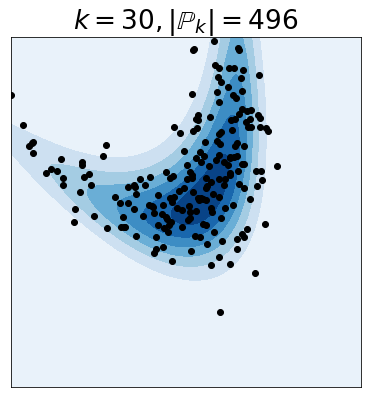

In [59]:
fig = plt.figure(figsize=(n*6,6))
for i, k in enumerate(ks) :
    ax = get_ax_clean(fig, len(ks), i+1)
    ax.contourf(X, Y, Ztar[i], cmap='Blues')
    ax.scatter(p_tar_2[i][1], p_tar_2[i][0], color='k')
    ax.set_title(r'$k = ' +str(k)+ ', |\mathbb{P}_k| = '+str(ss[i].multis.size())+'$')
plt.tight_layout()
plt.savefig('rosenbrock_exs.pdf')
plt.show()

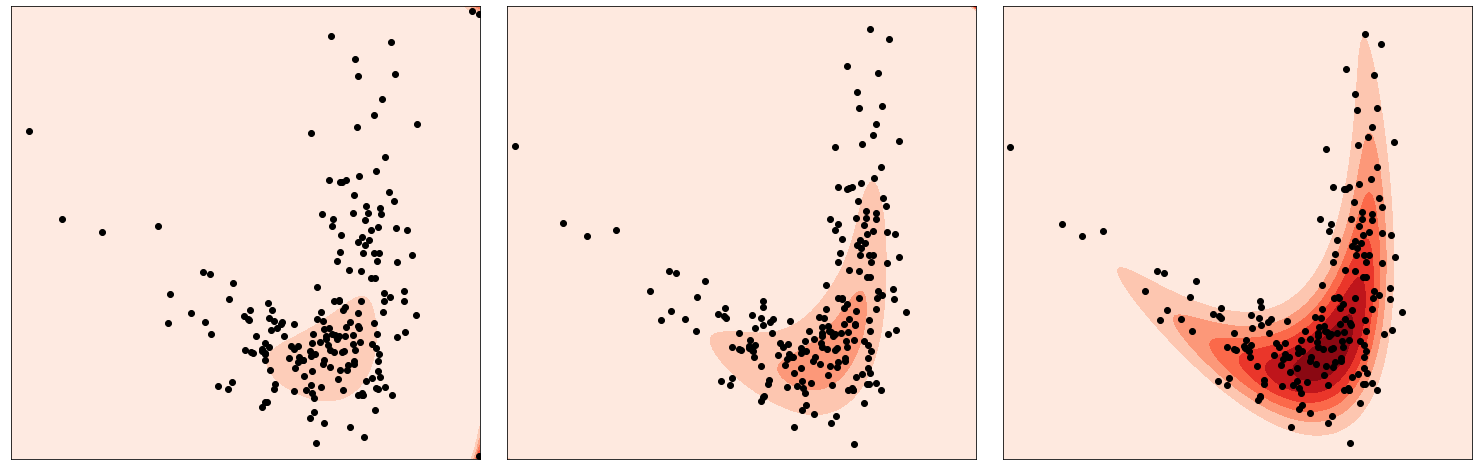

In [31]:
fig = plt.figure(figsize=(n*7,7))
for i, k in enumerate(ks) :
    ax = get_ax_clean(fig, len(ks), i+1)
    ax.contourf(X, Y, Ztar[i], cmap='Reds')
    ax.scatter(p_tar_2[i][1], p_tar_2[i][0], color='k')
plt.tight_layout()
plt.savefig('rosenbrock_exs.pdf')
plt.show()